<h1>DEIPARINE, ROBERT JOSH, F.</h1>
<H1>BSIT-3C</H1>
<H1>MIDTERM HANDSON</H1>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import folium 
from folium.plugins import HeatMap
warnings.filterwarnings("ignore")

In [58]:
data = pd.read_csv('datasets\\Chicago_Crimes.csv')
data

ID Case Number                    Date                  Block  \
0       13439321    JH237424  04/14/2024 12:00:00 AM    040XX S PRAIRIE AVE   
1       13437420    JH234779  04/14/2024 12:00:00 AM      023XX W CERMAK RD   
2       13428676    JH224478  04/14/2024 12:00:00 AM    043XX W LE MOYNE ST   
3       13429357    JH225293  04/14/2024 12:00:00 AM       039XX W ADAMS ST   
4       13430098    JH226395  04/14/2024 12:00:00 AM       011XX W 112TH PL   
...          ...         ...                     ...                    ...   
249118  13805239    JJ217509  04/12/2025 12:00:00 AM     029XX W LOGAN BLVD   
249119  13804023    JJ215813  04/12/2025 12:00:00 AM    094XX S HARVARD AVE   
249120  13803926    JJ215943  04/12/2025 12:00:00 AM  084XX S VINCENNES AVE   
249121  13803475    JJ215338  04/12/2025 12:00:00 AM    050XX S ABERDEEN ST   
249122  13804512    JJ216668  04/12/2025 12:00:00 AM    012XX W CARROLL AVE   

        IUCR         Primary Type                          Description  \
0       0890                THEFT                        FROM BUILDING   
1       2825        OTHER OFFENSE              HARASSMENT BY TELEPHONE   
2       0917  MOTOR VEHICLE THEFT        CYCLE, SCOOTER, BIKE WITH VIN   
3       143A    WEAPONS VIOLATION        UNLAWFUL POSSESSION - HANDGUN   
4       0890                THEFT                        FROM BUILDING   
...      ...                  ...                                  ...   
249118  2826        OTHER OFFENSE       HARASSMENT BY ELECTRONIC MEANS   
249119  0430              BATTERY  AGGRAVATED - OTHER DANGEROUS WEAPON   
249120  0486              BATTERY              DOMESTIC BATTERY SIMPLE   
249121  0530              ASSAULT  AGGRAVATED - OTHER DANGEROUS WEAPON   
249122  0710                THEFT             THEFT FROM MOTOR VEHICLE   

                Location Description  Arrest  Domestic  ...  Ward  \
0                          APARTMENT   False     False  ...     3   
1       COMMERCIAL / BUSINESS OFFICE   False     False  ...    25   
2                             STREET   False     False  ...    36   
3                             STREET    True     False  ...    28   
4                          RESIDENCE   False     False  ...    21   
...                              ...     ...       ...  ...   ...   
249118                     APARTMENT   False     False  ...     1   
249119                        STREET   False     False  ...     9   
249120                     APARTMENT   False      True  ...    21   
249121                        STREET    True     False  ...    20   
249122                        STREET   False     False  ...    27   

        Community Area  FBI Code  X Coordinate Y Coordinate  Year  \
0                 38.0        06     1178707.0    1878256.0  2024   
1                 31.0        26     1161210.0    1889347.0  2024   
2                 23.0        07     1146960.0    1909501.0  2024   
3                 26.0        15     1150158.0    1898721.0  2024   
4                 75.0        06     1170856.0    1830157.0  2024   
...                ...       ...           ...          ...   ...   
249118            22.0        26     1156478.0    1917149.0  2025   
249119            49.0       04B     1175694.0    1842631.0  2025   
249120            71.0       08B     1173850.0    1848976.0  2025   
249121            61.0       04A     1169838.0    1871348.0  2025   
249122            28.0        06     1168216.0    1902390.0  2025   

                    Updated On   Latitude  Longitude  \
0       12/21/2024 03:40:46 PM  41.821236 -87.619921   
1       12/21/2024 03:40:46 PM  41.852052 -87.683801   
2       12/21/2024 03:40:46 PM  41.907640 -87.735587   
3       12/21/2024 03:40:46 PM  41.877997 -87.724121   
4       12/21/2024 03:40:46 PM  41.689421 -87.650123   
...                        ...        ...        ...   
249118  04/19/2025 03:41:24 PM  41.928440 -87.700416   
249119  04/19/2025 03:41:24 PM  41.723545 -87.632040   
249120  04/19/

In [59]:
data.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  248266 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249120 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

<h1>FILLING UP NULL VALUES</h1>

In [61]:
data['Case Number'] = data['Case Number'].fillna(data['Case Number'].mode()[0])
data['Date'] = data['Date'].fillna(data['Date'].mode()[0])
data['Block'] = data['Block'].fillna(data['Block'].mode()[0])
data['IUCR'] = data['IUCR'].fillna(data['IUCR'].mode()[0])
data['Primary Type'] = data['Primary Type'].fillna(data['Primary Type'].mode()[0])
data['Description'] = data['Description'].fillna(data['Description'].mode()[0])
data['Location Description'] = data['Location Description'].fillna(data['Location Description'].mode()[0])
data['Arrest'] = data['Arrest'].fillna(data['Arrest'].mode()[0])
data['Domestic'] = data['Domestic'].fillna(data['Domestic'].mode()[0])
data['Beat'] = data['Beat'].fillna(data['Beat'].mode()[0])
data['District'] = data['District'].fillna(data['District'].mode()[0])
data['Ward'] = data['Ward'].fillna(data['Ward'].mode()[0])
data['Community Area'] = data['Community Area'].fillna(data['Community Area'].mode()[0])
data['FBI Code'] = data['FBI Code'].fillna(data['FBI Code'].mode()[0])
data['X Coordinate'] = data['X Coordinate'].fillna(data['X Coordinate'].mode()[0])
data['Y Coordinate'] = data['Y Coordinate'].fillna(data['Y Coordinate'].mode()[0])
data['Year'] = data['Year'].fillna(data['Year'].mode()[0])
data['Updated On'] = data['Updated On'].fillna(data['Updated On'].mode()[0])
data['Latitude'] = data['Latitude'].fillna(data['Latitude'].mode()[0])
data['Longitude'] = data['Longitude'].fillna(data['Longitude'].mode()[0])
data['Location'] = data['Location'].fillna(data['Location'].mode()[0])

In [62]:
data["Case Number"] = data["Case Number"].astype("category")
data["Date"] = data["Date"].astype("category")
data["Block"] = data["Block"].astype("category")
data["IUCR"] = data["IUCR"].astype("category")
data["Primary Type"] = data["Primary Type"].astype("category")
data["Description"] = data["Description"].astype("category")
data["Location Description"] = data["Location Description"].astype("category")
data["FBI Code"] = data["FBI Code"].astype("category")
data["Updated On"] = data["Updated On"].astype("category")
data["Location"] = data["Location"].astype("category")

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   ID                    249123 non-null  int64   
 1   Case Number           249123 non-null  category
 2   Date                  249123 non-null  category
 3   Block                 249123 non-null  category
 4   IUCR                  249123 non-null  category
 5   Primary Type          249123 non-null  category
 6   Description           249123 non-null  category
 7   Location Description  249123 non-null  category
 8   Arrest                249123 non-null  bool    
 9   Domestic              249123 non-null  bool    
 10  Beat                  249123 non-null  int64   
 11  District              249123 non-null  int64   
 12  Ward                  249123 non-null  int64   
 13  Community Area        249123 non-null  float64 
 14  FBI Code              249123 non-nul

<h1>35 QUESTION WITH INSIGHTS</h1>

<h1>1. WHERE IS THE MOST COMMON CRIME LOCATED?</h1>

In [64]:
data['Location Description'].value_counts()

Location Description
STREET                      66897
APARTMENT                   47787
RESIDENCE                   29776
SIDEWALK                    13265
SMALL RETAIL STORE           9858
                            ...  
HOTEL                           1
KENNEL                          1
BARBER SHOP/BEAUTY SALON        1
NEWSSTAND                       1
CTA "L" PLATFORM                1
Name: count, Length: 128, dtype: int64

<h1>INSIGHT: ACCORDING TO WHAT THE DATA IS SHOWING THAT IS THE MOST COMMON LOCATION</h1>    

<H1>2. WHAT IS THE TOP 3 MOST OF THE CRIME COMMITED?</H1>

In [65]:
crime_counts = data['Primary Type'].value_counts().head(3)
crime_counts

Primary Type
THEFT              59201
BATTERY            44579
CRIMINAL DAMAGE    27094
Name: count, dtype: int64

<H1>INSIGHT: THIS IS THE DATA THAT REPRESNTING OF THE TOP3 MOST COMMITED CRIME</H1>

<H1>3. IN WHAT YEAR ARE THE CRIME REPORTS AT LOWEST?</H1>

In [66]:
year_counts = data['Year'].value_counts()
least_year = year_counts[year_counts == year_counts.min()]
least_year

Year
2025    60205
Name: count, dtype: int64

<H1>INSIGHT: THE DATA SHOWS THAT THE LOWEST CRIME ARE IN 2025</H1>

<H1>4. WHICH DISTRICT HAS THE MOST CRIME SHOWS?</H1>

In [67]:
data['District'].value_counts().head(1)

District
8    16691
Name: count, dtype: int64

<h1> INSIGHT: THE DATA SHOWS THAT THIS IS THE DISTRICT WITH THE MOST CRIME SHOWS</h1>

<H1>5. HOW MANT CRIMES HAD LEAD TO AN ARREST OF THE CRIMINAL/OFFENDERS?</H1>

In [68]:
data['Arrest'].value_counts()

Arrest
False    213121
True      36002
Name: count, dtype: int64

<H1>INSIGHT: IT SHOWS THAT MOST OF THE OFFENDRS HAD ARRESTED IS LEAST</H1>

<H1>6. HOW MANY UNIQUE FBI CODES ARE AVAILABLE TO THE DATA?</H1>

In [69]:
data['FBI Code'].nunique()

26

<H1>INIGHT: EACH FBI CODE REPRESENTS A SPECIFIC CRIME CLASSIFICATION, HIGHLIGHTING THE WIDE RANGE OF CRIMINAL OFFENSES.</H1>

<H1>7. WHICH DISTRICT HAS THE LEAST CRIME SHOWS?</H1>

In [70]:
district_counts = data['District'].value_counts()
least_district = district_counts[district_counts == district_counts.min()]
least_district

District
31    19
Name: count, dtype: int64

<h1>INSIGHT: THIS INDICATES THE WARD WITH THE LOWEST NUMBER OF REPORTED CRIMES, WHICH MAY SUGGEST SAFER COMMUNITIES OR POSSIBLE UNDERREPORTING.
</h1>

<H1>8. MOST AND LEAST CRIME OF THE YEARS?</H1>

In [71]:
print("Most crimes in a year:", year_counts.max())
print("Least crimes in a year:", year_counts.min())

Most crimes in a year: 188918
Least crimes in a year: 60205


<h1>INSIGHT: THESE VALUES REPRESENT THE EXTREMES OF YEARLY CRIME VOLUMES, HELPING TO COMPARE THE MOST AND LEAST SAFE YEARS IN CHICAGO.
</h1>

<H1>9. WHAT PROPORTION OF CRIMES ARE CONNECTED TO DOMESTIC INCIDENTS?</H1>

In [72]:
data['Domestic'].mean()

np.float64(0.18604063053190592)

<h1>INSIGHT: 18% REPRESENTS THE SHARE OF CRIMES LINKED TO DOMESTIC VIOLENCE, AN IMPORTANT INDICATOR OF SOCIAL CONDITIONS.</h1>

<H1>10. WHAT ARE THE AVERAGE LATITUDE AND LONGITUDE COORDINATES OF RECORDED CRIMES?
</H1>

In [73]:
data[['Latitude','Longitude']].mean()

Latitude     41.847129
Longitude   -87.668871
dtype: float64

<h1>INSIGHT: PROVIDES THE GEOGRAPHIC CENTER OF REPORTED CRIMES, USEFUL FOR ANALYZING CRIME DENSITY ON MAPS.
</h1>

<H1>11. DISPLAY ALL THEFT RELATED CRIMES RECORDED IN 2025.</H1>

In [74]:
theft_2024 = data[(data['Primary Type'] == 'THEFT') & (data['Year'] == 2025)]
theft_2024.head(3)

ID Case Number                    Date                    Block  \
188926  13708610    JJ100814  01/01/2025 12:00:00 AM     042XX W ARMITAGE AVE   
188927  13708517    JJ100746  01/01/2025 12:00:00 AM  014XX S BLUE ISLAND AVE   
188938  13708601    JJ100848  01/01/2025 12:00:00 AM       044XX S PULASKI RD   

        IUCR Primary Type     Description  \
188926  0860        THEFT    RETAIL THEFT   
188927  0820        THEFT  $500 AND UNDER   
188938  0860        THEFT    RETAIL THEFT   

                         Location Description  Arrest  Domestic  ...  Ward  \
188926                      CONVENIENCE STORE   False     False  ...    26   
188927  POLICE FACILITY / VEHICLE PARKING LOT   False     False  ...    28   
188938                     SMALL RETAIL STORE    True     False  ...    14   

        Community Area  FBI Code  X Coordinate Y Coordinate  Year  \
188926            20.0        06     1147826.0    1912951.0  2025   
188927            28.0        06     1168519.0    1893359.0  2025   
188938            57.0        06     1150424.0    1874895.0  2025   

                    Updated On   Latitude  Longitude  \
188926  01/08/2025 03:42:09 PM  41.917091 -87.732317   
188927  01/08/2025 03:42:09 PM  41.862906 -87.656859   
188938  01/08/2025 03:42:09 PM  41.812611 -87.723765   

                             Location  
188926  (41.917091011, -87.732317425)  
188927  (41.862906101, -87.656858884)  
188938  (41.812610526, -87.723765071)  

[3 rows x 22 columns]

<H1>INSIGHT: HELPS TO FOCUS ON THEFT CASES FROM THE MOST RECENT YEAR TO IDENTIFY PATTERNS.
</H1>

<H1>12. DISPLAY DOMESTIC RELATED CRIMES OCCURRING IN WARD 10.
</H1>

In [75]:
domestic_w15 = data[(data['Ward'] == 10) & (data['Domestic'] == True)]
domestic_w15.head(3)

ID Case Number                    Date                  Block  \
24   13440865    JH239248  04/14/2024 12:00:00 AM       007XX E 133RD ST   
197  13429247    JH224401  04/14/2024 04:13:00 AM  089XX S BALTIMORE AVE   
486  13429517    JH225005  04/14/2024 03:57:00 PM   130XX S EXCHANGE AVE   

     IUCR   Primary Type                      Description  \
24   2820  OTHER OFFENSE                 TELEPHONE THREAT   
197  0560        ASSAULT                           SIMPLE   
486  4389  OTHER OFFENSE  VIOLATION GPS MONITORING DEVICE   

    Location Description  Arrest  Domestic  ...  Ward  Community Area  \
24             APARTMENT   False      True  ...    10            54.0   
197            APARTMENT   False      True  ...    10            46.0   
486            RESIDENCE   False      True  ...    10            55.0   

     FBI Code  X Coordinate Y Coordinate  Year              Updated On  \
24        08A     1183678.0    1817496.0  2024  12/21/2024 03:40:46 PM   
197       08A     1198450.0    1846241.0  2024  12/21/2024 03:40:46 PM   
486        26     1197765.0    1819090.0  2024  12/21/2024 03:40:46 PM   

      Latitude  Longitude                       Location  
24   41.654389 -87.603575   (41.654389164, -87.60357486)  
197  41.732912 -87.548567  (41.732912373, -87.548566762)  
486  41.658424 -87.551978  (41.658424474, -87.551978488)  

[3 rows x 22 columns]

<H1>INSIGHT: USEFUL FOR ANALYZING DOMESTIC SAFETY ISSUES WITHIN A SPECIFIC POLITICAL WARD.
</H1>

<H1>13. FILTER CRIMES THAT OCCURRED ON “STREET” LOCATIONS.</H1>

In [22]:
street_crimes = data[data['Location Description'] == 'STREET']
street_crimes.head(5)

ID Case Number                    Date                    Block  \
2   13428676    JH224478  04/14/2024 12:00:00 AM      043XX W LE MOYNE ST   
3   13429357    JH225293  04/14/2024 12:00:00 AM         039XX W ADAMS ST   
11  13428561    JH224385  04/14/2024 12:00:00 AM  008XX N SACRAMENTO BLVD   
18  13428850    JH224732  04/14/2024 12:00:00 AM          017XX E 86TH PL   
21  13428693    JH224570  04/14/2024 12:00:00 AM     025XX W MARQUETTE RD   

    IUCR         Primary Type                    Description  \
2   0917  MOTOR VEHICLE THEFT  CYCLE, SCOOTER, BIKE WITH VIN   
3   143A    WEAPONS VIOLATION  UNLAWFUL POSSESSION - HANDGUN   
11  1320      CRIMINAL DAMAGE                     TO VEHICLE   
18  0910  MOTOR VEHICLE THEFT                     AUTOMOBILE   
21  1320      CRIMINAL DAMAGE                     TO VEHICLE   

   Location Description  Arrest  Domestic  ...  Ward  Community Area  \
2                STREET   False     False  ...    36            23.0   
3                STREET    True     False  ...    28            26.0   
11               STREET   False     False  ...    27            23.0   
18               STREET   False     False  ...     8            45.0   
21               STREET   False     False  ...    16            66.0   

    FBI Code  X Coordinate Y Coordinate  Year              Updated On  \
2         07     1146960.0    1909501.0  2024  12/21/2024 03:40:46 PM   
3         15     1150158.0    1898721.0  2024  12/21/2024 03:40:46 PM   
11        14     1156077.0    1905265.0  2024  12/21/2024 03:40:46 PM   
18        07     1189399.0    1847970.0  2024  12/21/2024 03:40:46 PM   
21        14     1160767.0    1860148.0  2024  12/21/2024 03:40:46 PM   

     Latitude  Longitude                       Location  
2   41.907640 -87.735587  (41.907640473, -87.735587478)  
3   41.877997 -87.724121  (41.877997275, -87.724120826)  
11  41.895837 -87.702211  (41.895837291, -87.702210849)  
18  41.737879 -87.581669  (41.737878596, -87.581668867)  
21  41.771935 -87.686234  (41.771935215, -87.686233751)  

[5 rows x 22 columns]

<H1>INSIGHT: STREETS ARE COMMON PLACES FOR CRIMES TO OCCUR, PARTICULARLY THEFTS AND ASSAULTS, MAKING THEM HIGH PRIORITY AREAS FOR LAW ENFORCEMENT.</H1>

<H1>15. FILTER CRIMES FROM 2024 WHERE NO ARREST WAS RECORDED, HELPING TO IDENTIFY CASES THAT REMAIN UNSOLVED OR PENDING.</H1>

In [23]:
no_arrest_2024 = data[(data['Year'] == 2024) & (data['Arrest'] == False)]
no_arrest_2024.head(4)

ID Case Number                    Date                Block  IUCR  \
0  13439321    JH237424  04/14/2024 12:00:00 AM  040XX S PRAIRIE AVE  0890   
1  13437420    JH234779  04/14/2024 12:00:00 AM    023XX W CERMAK RD  2825   
2  13428676    JH224478  04/14/2024 12:00:00 AM  043XX W LE MOYNE ST  0917   
4  13430098    JH226395  04/14/2024 12:00:00 AM     011XX W 112TH PL  0890   

          Primary Type                    Description  \
0                THEFT                  FROM BUILDING   
1        OTHER OFFENSE        HARASSMENT BY TELEPHONE   
2  MOTOR VEHICLE THEFT  CYCLE, SCOOTER, BIKE WITH VIN   
4                THEFT                  FROM BUILDING   

           Location Description  Arrest  Domestic  ...  Ward  Community Area  \
0                     APARTMENT   False     False  ...     3            38.0   
1  COMMERCIAL / BUSINESS OFFICE   False     False  ...    25            31.0   
2                        STREET   False     False  ...    36            23.0   
4                     RESIDENCE   False     False  ...    21            75.0   

   FBI Code  X Coordinate Y Coordinate  Year              Updated On  \
0        06     1178707.0    1878256.0  2024  12/21/2024 03:40:46 PM   
1        26     1161210.0    1889347.0  2024  12/21/2024 03:40:46 PM   
2        07     1146960.0    1909501.0  2024  12/21/2024 03:40:46 PM   
4        06     1170856.0    1830157.0  2024  12/21/2024 03:40:46 PM   

    Latitude  Longitude                       Location  
0  41.821236 -87.619921  (41.821236024, -87.619920712)  
1  41.852052 -87.683801  (41.852051675, -87.683800849)  
2  41.907640 -87.735587  (41.907640473, -87.735587478)  
4  41.689421 -87.650123    (41.6894214, -87.650123247)  

[4 rows x 22 columns]

<H1>INSIGHT: DISPLAYS UNSOLVED CRIMES FROM THE MOST RECENT YEAR, PROVIDING INSIGHT INTO CASES THAT REQUIRE FURTHER INVESTIGATION.</H1>

<H1>16. DISPLAY ALL CRIMES WHERE AN ARREST HAS BEEN MADE, HIGHLIGHTING CASES WITH SUCCESSFUL LAW ENFORCEMENT ACTIONS.</H1>

In [24]:
arrested = data[data['Arrest'] == True]
arrested.head(5)

ID Case Number                    Date               Block  IUCR  \
3   13429357    JH225293  04/14/2024 12:00:00 AM    039XX W ADAMS ST  143A   
37  13428473    JH224225  04/14/2024 12:05:00 AM   008XX S MORGAN ST  0340   
39  13428434    JH224235  04/14/2024 12:05:00 AM  051XX S SAWYER AVE  2022   
40  13428435    JH224251  04/14/2024 12:07:00 AM     032XX W 23RD ST  0454   
48  13428448    JH224229  04/14/2024 12:20:00 AM     005XX E 79TH ST  1310   

         Primary Type                                        Description  \
3   WEAPONS VIOLATION                      UNLAWFUL POSSESSION - HANDGUN   
37            ROBBERY                     ATTEMPT STRONG ARM - NO WEAPON   
39          NARCOTICS                                  POSSESS - COCAINE   
40            BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   
48    CRIMINAL DAMAGE                                        TO PROPERTY   

   Location Description  Arrest  Domestic  ...  Ward  Community Area  \
3                STREET    True     False  ...    28            26.0   
37               STREET    True     False  ...    34            28.0   
39                ALLEY    True     False  ...    14            63.0   
40             SIDEWALK    True     False  ...    25            30.0   
48   SMALL RETAIL STORE    True     False  ...     6            44.0   

    FBI Code  X Coordinate Y Coordinate  Year              Updated On  \
3         15     1150158.0    1898721.0  2024  12/21/2024 03:40:46 PM   
37        03     1170047.0    1896351.0  2024  12/21/2024 03:40:46 PM   
39        18     1155583.0    1870313.0  2024  12/21/2024 03:40:46 PM   
40       08B     1154967.0    1888528.0  2024  12/21/2024 03:40:46 PM   
48        14     1181399.0    1852751.0  2024  12/21/2024 03:40:46 PM   

     Latitude  Longitude                       Location  
3   41.877997 -87.724121  (41.877997275, -87.724120826)  
37  41.871083 -87.651163  (41.871083204, -87.651162509)  
39  41.799935 -87.704965  (41.799934918, -87.704964513)  
40  41.849932 -87.706736  (41.849931544, -87.706736396)  
48  41.751186 -87.610831  (41.751186197, -87.610831447)  

[5 rows x 22 columns]

<H1>INSIGHT: ENABLES ANALYSIS OF SOLVED VERSUS UNSOLVED CASES TO ASSESS LAW ENFORCEMENT EFFECTIVENESS.</H1>

<H1>17. DISPLAY CRIMES WITH FBI CODE “10,” IDENTIFYING INCIDENTS THAT FALL UNDER THIS SPECIFIC CRIME CATEGORY.</H1>

In [26]:
fbi_06 = data[data['FBI Code'] == '10']
fbi_06.head(4)

ID Case Number                    Date                  Block  \
329   13432121    JH228604  04/14/2024 10:06:00 AM    046XX W BELMONT AVE   
979   13434563    JH231402  04/15/2024 09:00:00 AM    083XX S ASHLAND AVE   
985   13458952    JH261781  04/15/2024 09:00:00 AM  039XX S WENTWORTH AVE   
1063  13430137    JH226356  04/15/2024 12:00:00 PM  132XX S BALTIMORE AVE   

      IUCR        Primary Type              Description  \
329   1121  DECEPTIVE PRACTICE  COUNTERFEITING DOCUMENT   
979   1120  DECEPTIVE PRACTICE                  FORGERY   
985   1120  DECEPTIVE PRACTICE                  FORGERY   
1063  1120  DECEPTIVE PRACTICE                  FORGERY   

              Location Description  Arrest  Domestic  ...  Ward  \
329   COMMERCIAL / BUSINESS OFFICE   False     False  ...    30   
979                OTHER (SPECIFY)   False     False  ...    18   
985   COMMERCIAL / BUSINESS OFFICE   False     False  ...     3   
1063              FEDERAL BUILDING   False     False  ...    10   

      Community Area  FBI Code  X Coordinate Y Coordinate  Year  \
329             15.0        10     1144934.0    1920872.0  2024   
979             71.0        10     1167126.0    1849365.0  2024   
985             37.0        10     1175586.0    1878732.0  2024   
1063            55.0        10     1199097.0    1817757.0  2024   

                  Updated On   Latitude  Longitude  \
329   12/21/2024 03:40:46 PM  41.938882 -87.742742   
979   12/21/2024 03:40:46 PM  41.742212 -87.663231   
985   12/21/2024 03:40:46 PM  41.822613 -87.631356   
1063  12/21/2024 03:40:46 PM  41.654733 -87.547149   

                           Location  
329   (41.938882125, -87.742742299)  
979    (41.74221153, -87.663231477)  
985   (41.822612749, -87.631355755)  
1063  (41.654733332, -87.547148983)  

[4 rows x 22 columns]

<H1>INSIGHT: FBI CODE 10 TYPICALLY REFERS TO FORGERY OR COUNTERFEITING OF DOCUMENTS, COVERING CRIMES INVOLVING FRAUDULENTLY MADE OR ALTERED PAPERS.</H1>

<H1>18. DISPLAY DOMESTIC RELATED CRIMES THAT OCCURRED IN APARTMENT LOCATIONS, PROVIDING INSIGHT INTO HOUSEHOLD SAFETY ISSUES WITHIN RESIDENTIAL BUILDINGS.</H1>

In [27]:
domestic_apartment = data[(data['Domestic'] == True) & 
                          (data['Location Description'] == 'APARTMENT')]
domestic_apartment.head(5)

ID Case Number                    Date                    Block  \
5   13429030    JH224976  04/14/2024 12:00:00 AM     062XX S MICHIGAN AVE   
24  13440865    JH239248  04/14/2024 12:00:00 AM         007XX E 133RD ST   
34  13428422    JH224221  04/14/2024 12:03:00 AM     007XX S FINANCIAL PL   
35  13428458    JH224217  04/14/2024 12:03:00 AM     008XX S LAWNDALE AVE   
36  13428437    JH224310  04/14/2024 12:05:00 AM  055XX W WASHINGTON BLVD   

    IUCR   Primary Type                                        Description  \
5   0486        BATTERY                            DOMESTIC BATTERY SIMPLE   
24  2820  OTHER OFFENSE                                   TELEPHONE THREAT   
34  051A        ASSAULT                               AGGRAVATED - HANDGUN   
35  051A        ASSAULT                               AGGRAVATED - HANDGUN   
36  0496        BATTERY  AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...   

   Location Description  Arrest  Domestic  ...  Ward  Community Area  \
5             APARTMENT   False      True  ...    20            40.0   
24            APARTMENT   False      True  ...    10            54.0   
34            APARTMENT   False      True  ...    34            32.0   
35            APARTMENT   False      True  ...    24            27.0   
36            APARTMENT   False      True  ...    29            25.0   

    FBI Code  X Coordinate Y Coordinate  Year              Updated On  \
5        08B     1178263.0    1863570.0  2024  12/21/2024 03:40:46 PM   
24       08A     1183678.0    1817496.0  2024  12/21/2024 03:40:46 PM   
34       04A     1175104.0    1897037.0  2024  12/21/2024 03:40:46 PM   
35       04A     1151845.0    1896015.0  2024  12/21/2024 03:40:46 PM   
36       04B     1139376.0    1900200.0  2024  12/21/2024 03:40:46 PM   

     Latitude  Longitude                       Location  
5   41.780946 -87.621995  (41.780946398, -87.621995369)  
24  41.654389 -87.603575   (41.654389164, -87.60357486)  
34  41.872854 -87.632576   (41.87285385, -87.632576028)  
35  41.870539 -87.717998  (41.870538687, -87.717997752)  
36  41.882259 -87.763674  (41.882259032, -87.763674222)  

[5 rows x 22 columns]

<H1>INSIGHT: DOMESTIC CRIMES FREQUENTLY OCCUR WITHIN PRIVATE RESIDENCES, OFTEN SHOWING PATTERNS OF REPEATED INCIDENTS IN THESE SETTINGS.</H1>

<H1>19. DISPLAY CRIMES THAT OCCURRED IN COMMUNITY AREA 10, ALLOWING FOR FOCUSED ANALYSIS OF CRIME TRENDS IN THIS SPECIFIC REGION.</H1>

In [28]:
ca_10 = data[data['Community Area'] == 10]
ca_10.head(3)

ID Case Number                    Date                  Block  \
612  13429843    JH225285  04/14/2024 08:00:00 PM   062XX W PETERSON AVE   
811  13429772    JH225660  04/15/2024 12:45:00 AM  066XX W SCHREIBER AVE   
942  13431350    JH228060  04/15/2024 08:00:00 AM    056XX N OSCEOLA AVE   

     IUCR         Primary Type                    Description  \
612  0910  MOTOR VEHICLE THEFT                     AUTOMOBILE   
811  0930  MOTOR VEHICLE THEFT  THEFT / RECOVERY - AUTOMOBILE   
942  1110   DECEPTIVE PRACTICE                    BOGUS CHECK   

    Location Description  Arrest  Domestic  ...  Ward  Community Area  \
612               STREET   False     False  ...    39            10.0   
811               STREET   False     False  ...    41            10.0   
942            RESIDENCE   False     False  ...    41            10.0   

     FBI Code  X Coordinate Y Coordinate  Year              Updated On  \
612        07     1133416.0    1939479.0  2024  12/21/2024 03:40:46 PM   
811        07     1130691.0    1942405.0  2024  12/21/2024 03:40:46 PM   
942        11     1125667.0    1937011.0  2024  12/21/2024 03:40:46 PM   

      Latitude  Longitude                       Location  
612  41.990152 -87.784637  (41.990151524, -87.784636614)  
811  41.998228 -87.794592  (41.998228201, -87.794592194)  
942  41.983512 -87.813195   (41.98351178, -87.813194735)  

[3 rows x 22 columns]

<H1>INSIGHT: ENABLES FOCUSED INSPECTION OF SAFETY WITHIN A SPECIFIC COMMUNITY AREA.</H1>

<H1>20. DISPLAY MOTOR VEHICLE THEFTS RECORDED IN DISTRICT 10, ASSISTING IN TARGETED ANALYSIS OF VEHICLE-RELATED CRIMES IN THAT AREA.</H1>

In [29]:
veh_thefts_d10 = data[(data['Primary Type'] == 'MOTOR VEHICLE THEFT') & 
                      (data['District'] == 10)]
veh_thefts_d10.head(5)

ID Case Number                    Date                     Block  \
2165  13431637    JH228172  04/16/2024 11:10:00 PM        026XX S KEDZIE AVE   
2187  13431888    JH228393  04/17/2024 12:00:00 AM  013XX S CENTRAL PARK AVE   
2821  13433230    JH229489  04/17/2024 09:45:00 PM      015XX S ST LOUIS AVE   
2824  13433429    JH230413  04/17/2024 10:00:00 PM           037XX W 32ND ST   
4170  13436535    JH234061  04/19/2024 11:30:00 PM      013XX S KOMENSKY AVE   

      IUCR         Primary Type Description  \
2165  0910  MOTOR VEHICLE THEFT  AUTOMOBILE   
2187  0910  MOTOR VEHICLE THEFT  AUTOMOBILE   
2821  0910  MOTOR VEHICLE THEFT  AUTOMOBILE   
2824  0910  MOTOR VEHICLE THEFT  AUTOMOBILE   
4170  0910  MOTOR VEHICLE THEFT  AUTOMOBILE   

                        Location Description  Arrest  Domestic  ...  Ward  \
2165                             GAS STATION   False     False  ...    25   
2187                                  STREET   False     False  ...    24   
2821                                  STREET   False      True  ...    24   
2824                                  STREET   False     False  ...    22   
4170  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  ...    24   

      Community Area  FBI Code  X Coordinate Y Coordinate  Year  \
2165            30.0        07     1155448.0    1886393.0  2024   
2187            29.0        07     1152590.0    1893383.0  2024   
2821            29.0        07     1153287.0    1892246.0  2024   
2824            30.0        07     1151732.0    1883120.0  2024   
4170            29.0        07     1149596.0    1893494.0  2024   

                  Updated On   Latitude  Longitude  \
2165  12/21/2024 03:40:46 PM  41.844063 -87.705028   
2187  12/21/2024 03:40:46 PM  41.863301 -87.715332   
2821  12/21/2024 03:40:46 PM  41.860168 -87.712804   
2824  12/21/2024 03:40:46 PM  41.835155 -87.718751   
4170  12/21/2024 03:40:46 PM  41.863665 -87.726320   

                           Location  
2165  (41.844063211, -87.705028372)  
2187  (41.863301496, -87.715332155)  
2821  (41.860167642, -87.712803676)  
2824  (41.835155473, -87.718751453)  
4170  (41.863664709, -87.726320093)  

[5 rows x 22 columns]

<H1>INSIGHT: HIGHLIGHTS THE CONCENTRATION OF CAR THEFTS WITHIN SPECIFIC DISTRICTS, PROVIDING INSIGHT FOR TARGETED PREVENTION EFFORTS.</H1>

<H1>21. ANNUAL COUNT OF MOTOR VEHICLE THEFTS, USEFUL FOR TRACKING TRENDS OVER TIME.</H1>

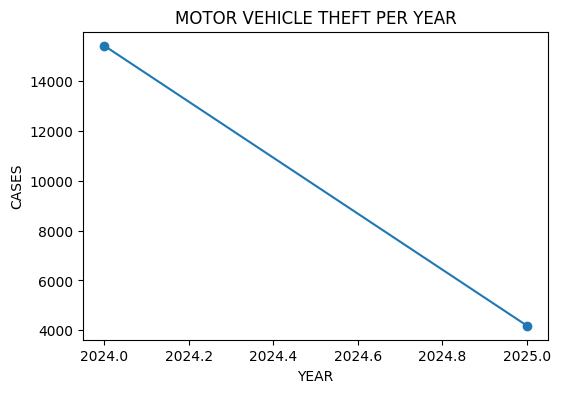

In [36]:
plt.figure(figsize=(6,4))
data[data['Primary Type']=='MOTOR VEHICLE THEFT']['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("MOTOR VEHICLE THEFT PER YEAR")
plt.xlabel("YEAR")
plt.ylabel("CASES")
plt.show()

<H1>INSIGHT: VEHICLE THEFTS CAN INCREASE IN CERTAIN YEARS DUE TO CHANGES IN POLICING STRATEGIES OR VARIATIONS IN VEHICLE USAGE TRENDS.</H1>

<H1>22. YEARLY TREND OF THEFT CRIMES, REVEALING FLUCTUATIONS THAT MAY BE INFLUENCED BY ECONOMIC CONDITIONS, LAW ENFORCEMENT EFFORTS, OR SOCIAL FACTORS.</H1>

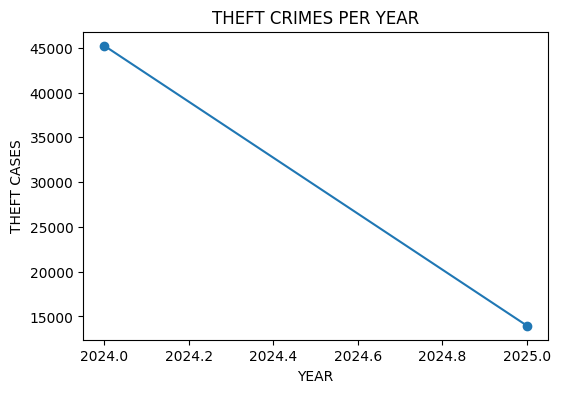

In [35]:
plt.figure(figsize=(6,4))
data[data['Primary Type']=='THEFT']['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("THEFT CRIMES PER YEAR")
plt.xlabel("YEAR")
plt.ylabel("THEFT CASES")
plt.show()

<H1>INSIGHT: THEFT CRIMES OFTEN REFLECT URBAN ECONOMIC PATTERNS, WITH RATES RISING OR FALLING IN RESPONSE TO CHANGES IN EMPLOYMENT, INCOME, AND SOCIAL CONDITIONS.</H1>

<H1>23. NUMBER OF CRIMES REPORTED IN EACH COMMUNITY AREA, PROVIDING A GEOGRAPHIC BREAKDOWN OF CRIMINAL ACTIVITY ACROSS THE CITY.</H1>

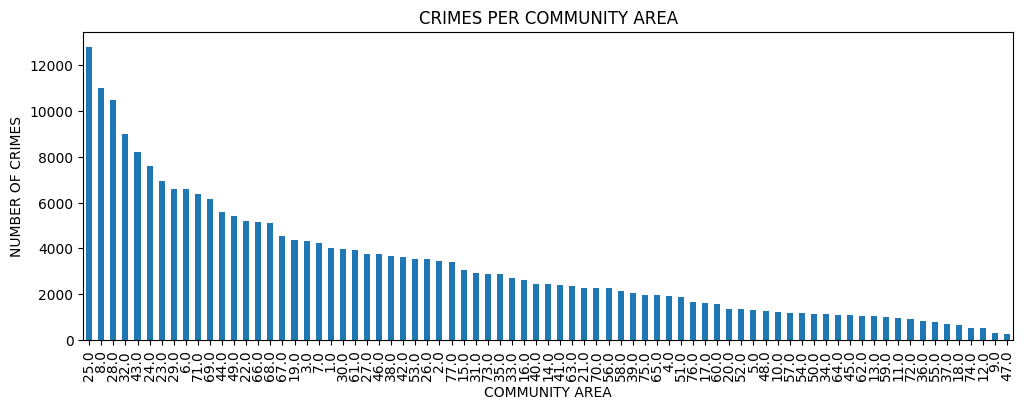

In [40]:
plt.figure(figsize=(12,4))
data['Community Area'].value_counts().plot(kind='bar')
plt.title("CRIMES PER COMMUNITY AREA")
plt.xlabel("COMMUNITY AREA")
plt.ylabel("NUMBER OF CRIMES")
plt.show()

<H1>INSIGHT: LARGER OR MORE DENSELY POPULATED COMMUNITIES TEND TO REPORT HIGHER NUMBERS OF CRIMES, OFTEN DUE TO GREATER ACTIVITY AND OPPORTUNITY FOR OFFENSES.</H1>

<H1>24. NUMBER OF CRIMES REPORTED IN EACH WARD.</H1>

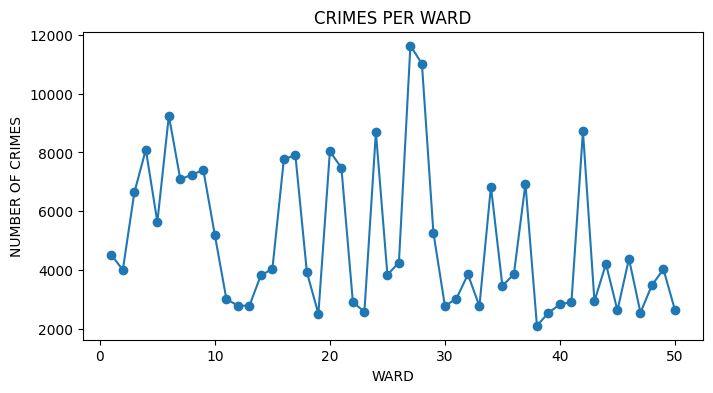

In [41]:
plt.figure(figsize=(8,4))
data['Ward'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("CRIMES PER WARD")
plt.xlabel("WARD")
plt.ylabel("NUMBER OF CRIMES")
plt.show()

<H1>INSIGHT: SOME WARDS EMERGE AS DISTINCT CRIME HOTSPOTS, INDICATING AREAS THAT MAY REQUIRE HEIGHTENED LAW ENFORCEMENT OR COMMUNITY INTERVENTION.</H1>

<H1>25. NUMBER OF CRIMES RECORDED IN EACH POLICE DISTRICT.</H1>

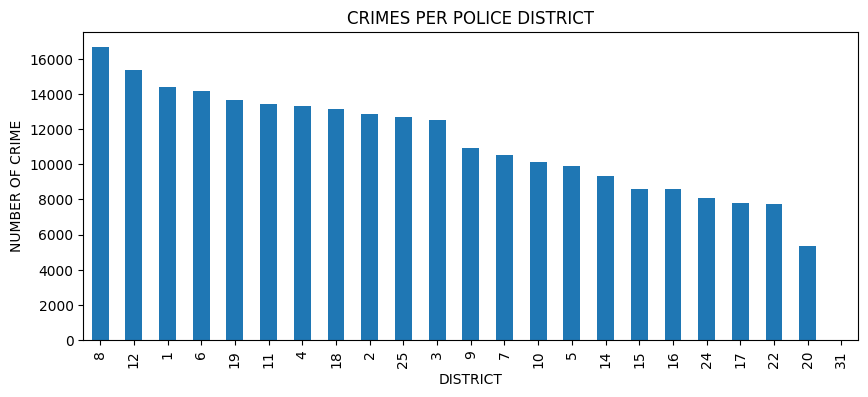

In [42]:
plt.figure(figsize=(10,4))
data['District'].value_counts().plot(kind='bar')
plt.title("CRIMES PER POLICE DISTRICT")
plt.xlabel("DISTRICT")
plt.ylabel("NUMBER OF CRIME")
plt.show()

<H1>INSIGHT: SOME POLICE DISTRICTS MANAGE SIGNIFICANTLY HIGHER CRIME VOLUMES THAN OTHERS, REFLECTING DIFFERENCES IN POPULATION DENSITY, SOCIOECONOMIC CONDITIONS, AND RESOURCE ALLOCATION.</H1>

<H1>26. TOP 10 CRIME TYPES.</H1>

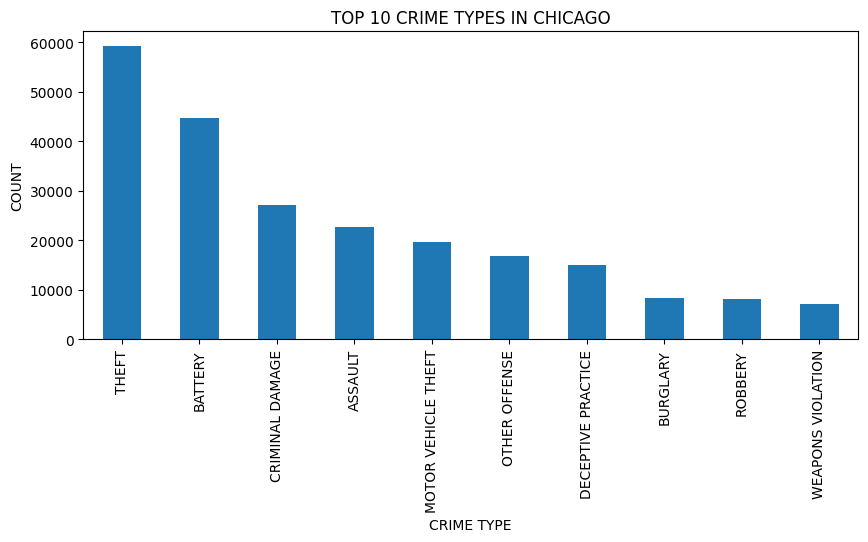

In [46]:
plt.figure(figsize=(10,4))
data['Primary Type'].value_counts().head(10).plot(kind='bar')
plt.title("TOP 10 CRIME TYPES IN CHICAGO")
plt.xlabel("CRIME TYPE")
plt.ylabel("COUNT")
plt.show()

<H1>27. CRIMES PER YEAR RECORDED.</H1>

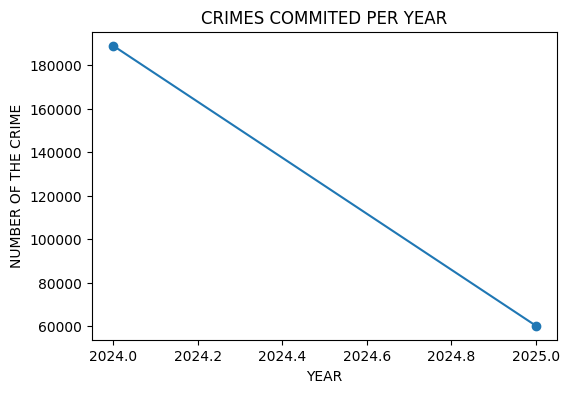

In [47]:
plt.figure(figsize=(6,4))
data['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("CRIMES COMMITED PER YEAR")
plt.xlabel("YEAR")
plt.ylabel("NUMBER OF THE CRIME")
plt.show()

<H1>INSIGHT: REVEALS INCREASING OR DECREASING TRENDS IN CRIME REPORTING, WHICH MAY REFLECT CHANGES IN COMMUNITY TRUST, POLICING EFFORTS, OR ACTUAL CRIME RATES.</H1>

<H1>28. COMPARISON BETWEEN CASES THAT RESULTED IN ARRESTS AND THOSE THAT DID NOT, PROVIDING INSIGHT INTO LAW ENFORCEMENT EFFECTIVENESS AND CASE RESOLUTION RATES.</H1>

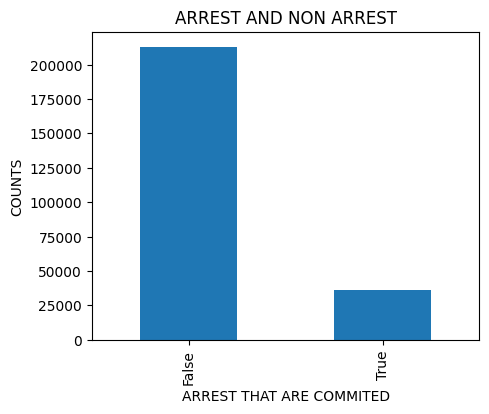

In [49]:
plt.figure(figsize=(5,4))
data['Arrest'].value_counts().plot(kind='bar')
plt.title("ARREST AND NON ARREST")
plt.xlabel("ARREST THAT ARE COMMITED")
plt.ylabel("COUNTS")
plt.show()

<H1>INSIGHT: THE MAJORITY OF CRIMES DO NOT LEAD TO IMMEDIATE ARRESTS, OFTEN DUE TO INVESTIGATION REQUIREMENTS OR LACK OF SUFFICIENT EVIDENCE AT THE SCENE.</H1>

<H1>29. TOP 10 CRIME LOCATIONS</H1>

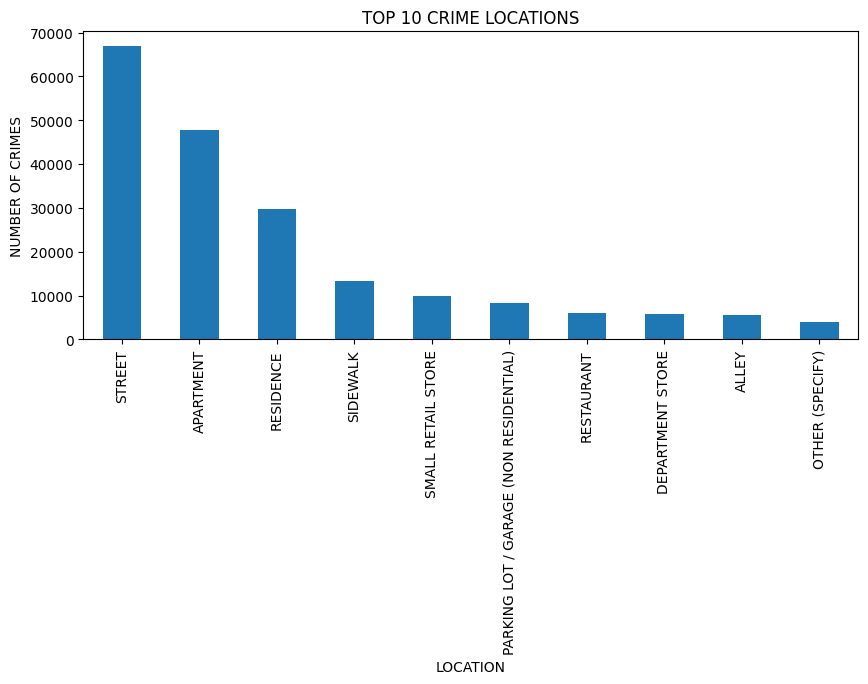

In [51]:
plt.figure(figsize=(10,4))
data['Location Description'].value_counts().head(10).plot(kind='bar')
plt.title("TOP 10 CRIME LOCATIONS")
plt.xlabel("LOCATION")
plt.ylabel("NUMBER OF CRIMES")
plt.show()

<H1>INSIGHT: STREETS AND APARTMENTS FREQUENTLY RANK AS THE MOST COMMON LOCATIONS FOR CRIMES, REFLECTING HIGH ACTIVITY AND DENSITY IN THESE AREAS.</H1>

<H1>30. COMPARISON BETWEEN DOMESTIC AND NON DOMESTIC CRIMES.</H1>

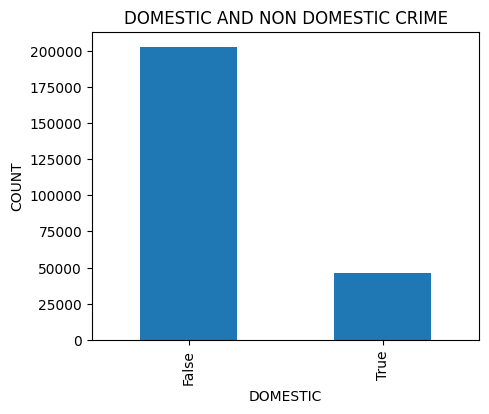

In [53]:
plt.figure(figsize=(5,4))
data['Domestic'].value_counts().plot(kind='bar')
plt.title("DOMESTIC AND NON DOMESTIC CRIME")
plt.xlabel("DOMESTIC")
plt.ylabel("COUNT")
plt.show()

<H1>INSIGHT: DOMESTIC CRIMES OCCUR LESS FREQUENTLY BUT TEND TO HAVE A SIGNIFICANT IMPACT ON VICTIMS AND COMMUNITIES.
</H1>

<H1>31. VISUAL REPRESENTATION OF CRIMES RESULTING IN ARRESTS, USING A HEATMAP TO IDENTIFY AREAS WITH HIGHER RATES OF LAW ENFORCEMENT SUCCESS.</H1>

In [76]:
arrested = data[data['Arrest'] == True]
locations = list(zip(arrested['Latitude'], arrested['Longitude']))

m5 = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m5)
m5.save("Heatmap_Arrested.html")
m5

<h1>INISGHT: CRIMES RESULTING IN ARRESTS ARE MORE FREQUENT IN AREAS WITH A STRONG POLICE PRESENCE, INDICATING EFFECTIVE LAW ENFORCEMENT AND QUICK RESPONSE.</h1>

<H1>32. VISUALIZATION OF THEFT CRIMES USING A HEATMAP TO IDENTIFY HOTSPOTS AND PATTERNS OF THEFT ACROSS DIFFERENT AREAS.</H1>

In [78]:
theft = data[data['Primary Type'] == 'THEFT']
locations = list(zip(theft['Latitude'], theft['Longitude']))

m1 = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m1)
m1.save("HEATMAP_THEFT.html")
m1

<H1>INSIGHT: THEFT IS WIDELY DISTRIBUTED ACROSS CHICAGO, WITH HOTSPOTS CONCENTRATED IN SHOPPING DISTRICTS AND RESIDENTIAL NEIGHBORHOODS.</H1>

<H1>33. VISUAL REPRESENTATION OF DOMESTIC CRIMES USING A HEATMAP TO HIGHLIGHT AREAS WITH HIGH INCIDENCE OF DOMESTIC INCIDENTS.</H1>

In [80]:
domestic = data[data['Domestic'] == True]
locations = list(zip(domestic['Latitude'], domestic['Longitude']))

m4 = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m4)
m4.save("HEATMAP_DOMESTIC.html")
m4

<H1>INSIGHT: DOMESTIC-RELATED CRIMES ARE HEAVILY CLUSTERED IN RESIDENTIAL NEIGHBORHOODS, REFLECTING THE PRIVATE NATURE OF THESE OFFENSES.</H1>

<H1>34. VISUAL REPRESENTATION OF ASSAULT CRIMES USING A HEATMAP TO IDENTIFY AREAS WITH HIGH INCIDENT RATES AND POTENTIAL RISK ZONES.</H1>

In [81]:
assault = data[data['Primary Type'] == 'ASSAULT']
locations = list(zip(assault['Latitude'], assault['Longitude']))

m2 = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m2)
m2.save("ASSUALT_HEATMAP.html")
m2

<h1>INSIGHT: ASSAULTS TYPICALLY OCCUR IN NEIGHBORHOODS WITH ACTIVE NIGHTLIFE AND HIGHLY DENSE HOUSING, WHERE SOCIAL INTERACTIONS ARE MORE FREQUENT AND TENSIONS MAY ESCALATE.</h1>

<H1>35. VISUAL REPRESENTATION OF WEAPON VIOLATION INCIDENTS USING A HEATMAP TO IDENTIFY AREAS WITH HIGH FREQUENCY OF WEAPON-RELATED OFFENSES.</H1>

In [82]:
weapon = data[data['Primary Type'] == 'WEAPONS VIOLATION']
locations = list(zip(weapon['Latitude'], weapon['Longitude']))

m3 = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m3)
m3.save("Heatmap_Weapon_Violation.html")
m3

<h1>INSIGHT: WEAPON VIOLATION REFERS TO OFFENSES INVOLVING ILLEGAL POSSESSION, USE, OR CARRYING OF WEAPONS, OFTEN LINKED TO VIOLENT CRIMES AND PUBLIC SAFETY RISKS.</h1>